In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#conclusion
1. in 'residual sugar', 'free sulfur dioxide' and 'total sulfur dioxide' may be outlier present.

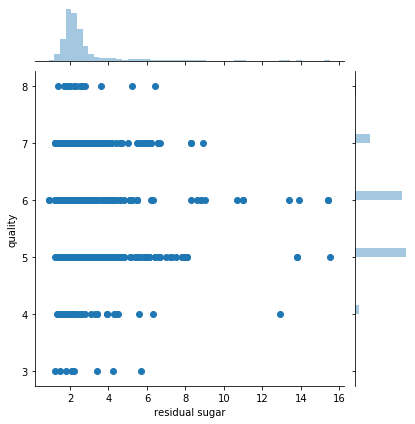

In [6]:
sns.jointplot(x='residual sugar', y='quality', data=data)

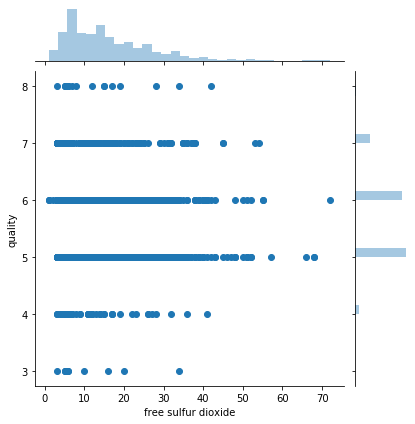

In [7]:
sns.jointplot(x='free sulfur dioxide', y='quality', data=data)

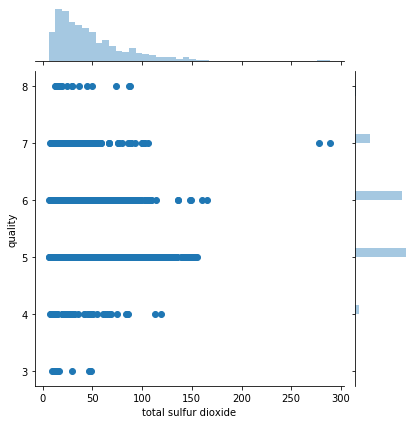

In [8]:
sns.jointplot(x='total sulfur dioxide', y='quality', data=data)

## there is two outlier present in 'total sulfur dioxide'

In [9]:
UpperLimit = np.percentile(data['total sulfur dioxide'], [99])[0]
UpperLimit

145.0

In [10]:
data[(data['total sulfur dioxide'] > UpperLimit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5
591,6.6,0.390,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5,6
636,9.6,0.880,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,5
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6
651,9.8,0.880,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5


In [11]:
data['total sulfur dioxide'][(data['total sulfur dioxide'] > 1.5*UpperLimit)] = 1.5*UpperLimit

C:\Users\hp\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
data[(data['total sulfur dioxide'] > UpperLimit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5
591,6.6,0.390,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5,6
636,9.6,0.880,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,5
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6
651,9.8,0.880,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5


In [13]:
data.isnull().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [14]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.114374,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.080937,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.030744,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.195846,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.050188,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.673055,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.114374,0.080937,0.030744,0.195846,0.050188,0.673055,1.000000,0.077256,-0.062581,0.045862,-0.213432,-0.192365
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.077256,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.062581,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.045862,0.148506,-0.196648,1.000000,0.093595,0.251397


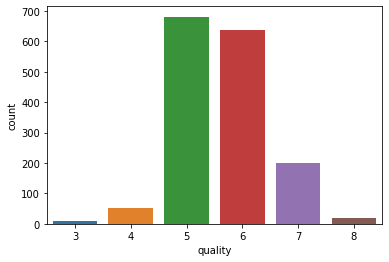

In [15]:
sns.countplot(x = 'quality', data=data)

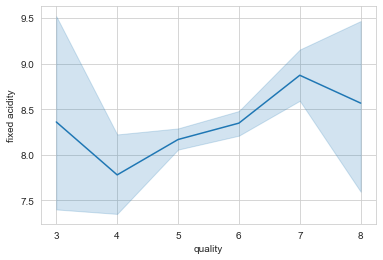

In [16]:
sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="fixed acidity")

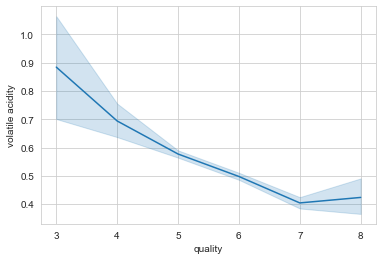

In [17]:
sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="volatile acidity")

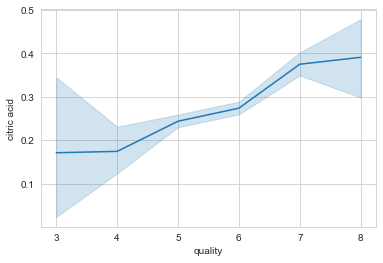

In [18]:
sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="citric acid")

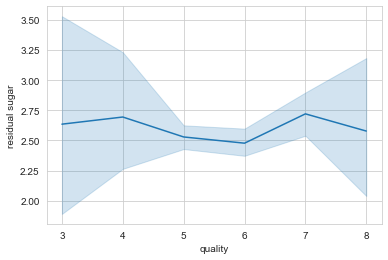

In [19]:
sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="residual sugar")

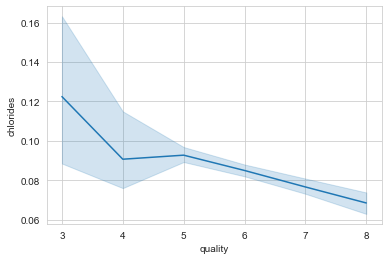

In [20]:
sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="chlorides")

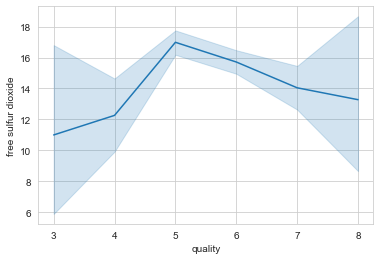

In [21]:
sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="free sulfur dioxide")

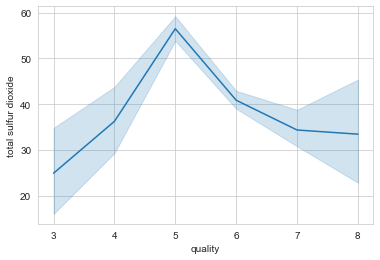

In [22]:
sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="total sulfur dioxide")

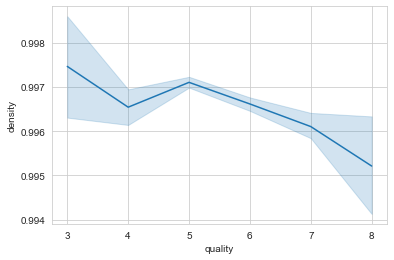

In [23]:
sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="density")

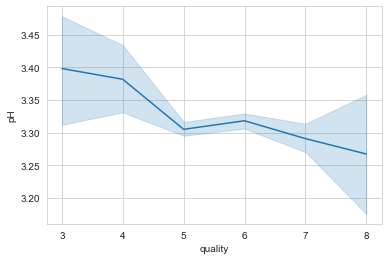

In [24]:
sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="pH")

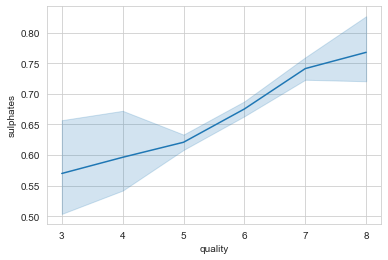

In [25]:
sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="sulphates")

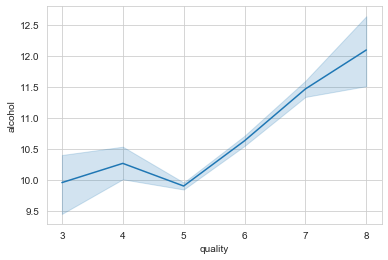

In [26]:
sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="alcohol")

# conclusion
### 1. With the increase of the quality score, the composition of chlorides and volatile acidity decreases.
### 2. With the increase for quality score, the compostion of alcohol, sulphates and citric acid increases.

In [27]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [28]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


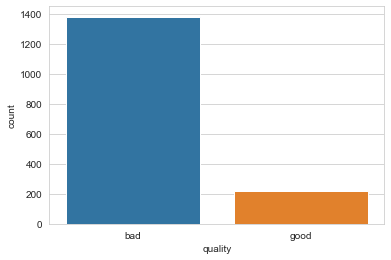

In [29]:
sns.countplot(x = 'quality', data=data)

In [30]:
labelencoder = LabelEncoder()

In [31]:
data['quality'] = labelencoder.fit_transform(data['quality'])

In [32]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Spliting the dataset into train and test set

In [33]:
target = 'quality'
x = data.drop(['quality'], axis=1)
y = data[target]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
LogisticRegression = LogisticRegression(C=0.7)

In [38]:
LogisticRegression.fit(x_train, y_train)

C:\Users\hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.7)

Acuracy of logistic regression for test set:  86.5625
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.62      0.21      0.32        47

    accuracy                           0.87       320
   macro avg       0.75      0.60      0.62       320
weighted avg       0.84      0.87      0.84       320

Confusion Matrix : 
 [[267   6]
 [ 37  10]]

Confusion Matrix heatmap : 


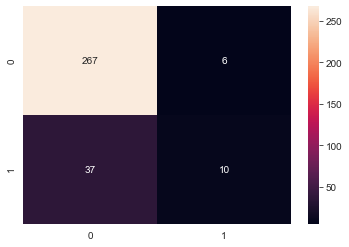

In [39]:
print("Acuracy of logistic regression for test set: ", accuracy_score(y_test, LogisticRegression.predict(x_test))*100)
print('Classification Report : \n', classification_report(y_test, LogisticRegression.predict(x_test)))
print("Confusion Matrix : \n", confusion_matrix(y_test, LogisticRegression.predict(x_test)))
print('\nConfusion Matrix heatmap : ')
sns.heatmap(confusion_matrix(y_test, LogisticRegression.predict(x_test)), annot=True, fmt='d')

Acuracy of SVM classifier for train set:  88.19390148553558

Classification Report for train set : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1109
           1       0.65      0.25      0.36       170

    accuracy                           0.88      1279
   macro avg       0.77      0.61      0.65      1279
weighted avg       0.86      0.88      0.86      1279


Confusion Matrix for train set : 
 [[1086   23]
 [ 128   42]]

Confusion Matrix Heatamp for train set: 


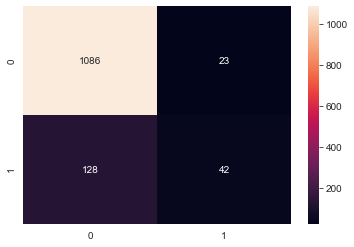

In [40]:
print("Acuracy of SVM classifier for train set: ", accuracy_score(y_train, LogisticRegression.predict(x_train))*100)
print('\nClassification Report for train set : \n', classification_report(y_train, LogisticRegression.predict(x_train)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(y_train, LogisticRegression.predict(x_train)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(y_train, LogisticRegression.predict(x_train)), annot=True, fmt='d')

## Support vector machine

In [41]:
from sklearn.svm import SVC

In [42]:
kernals = ['rbf', 'poly', 'linear']

In [43]:
accuracy = []
for i in kernals:
    svm_classifier = SVC(C=1.7, kernel=i, random_state=5)
    svm_classifier.fit(x_train, y_train)
    accuracy.append(accuracy_score(y_test, svm_classifier.predict(x_test))*100)

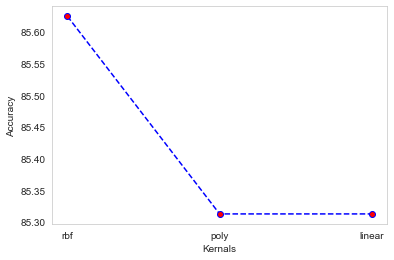

In [44]:
plt.plot(kernals, accuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')    
plt.xlabel('Kernals')
plt.ylabel('Accuracy')
plt.grid()

In [45]:
svm_classifier = SVC(C=1.7, kernel='rbf', random_state=5)
svm_classifier.fit(x_train, y_train)

SVC(C=1.7, random_state=5)


Acuracy of SVM classifier for test set:  85.625

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320


Confusion Matrix for test case : 
 [[273   0]
 [ 46   1]]

Confusion Matrix Heatamp for test case: 


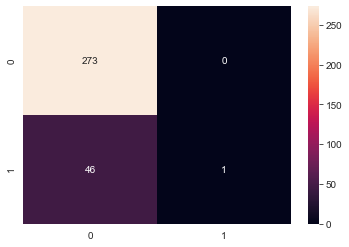

In [46]:
print("\nAcuracy of SVM classifier for test set: ", accuracy_score(y_test, svm_classifier.predict(x_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, svm_classifier.predict(x_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, svm_classifier.predict(x_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, svm_classifier.predict(x_test)), annot=True, fmt='d')

Acuracy of SVM classifier for train set:  86.7865519937451

Classification Report for train set : 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      1109
           1       1.00      0.01      0.01       170

    accuracy                           0.87      1279
   macro avg       0.93      0.50      0.47      1279
weighted avg       0.89      0.87      0.81      1279


Confusion Matrix for train set : 
 [[1109    0]
 [ 169    1]]

Confusion Matrix Heatamp for train set: 


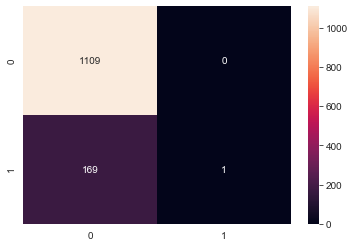

In [47]:
print("Acuracy of SVM classifier for train set: ", accuracy_score(y_train, svm_classifier.predict(x_train))*100)
print('\nClassification Report for train set : \n', classification_report(y_train, svm_classifier.predict(x_train)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(y_train, svm_classifier.predict(x_train)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(y_train, svm_classifier.predict(x_train)), annot=True, fmt='d')

## K-Nearest Neighbour

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
neighbors = [i for i in range(1,21)]

In [50]:
accuracy=[]
for k in neighbors:    
    Knn_classifier = KNeighborsClassifier(n_neighbors=k)
    Knn_classifier.fit(x_train, y_train)
    accuracy.append(accuracy_score(y_test, Knn_classifier.predict(x_test))*100)

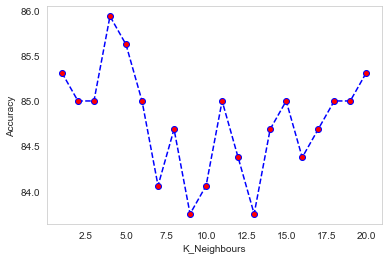

In [51]:
plt.plot(neighbors, accuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')    
plt.xlabel('K_Neighbours')
plt.ylabel('Accuracy')
plt.grid()

In [52]:
Knn_classifier = KNeighborsClassifier(n_neighbors=4)
Knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)


Acuracy of KNN classifier for test set:  85.9375

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       273
           1       0.60      0.13      0.21        47

    accuracy                           0.86       320
   macro avg       0.73      0.56      0.57       320
weighted avg       0.83      0.86      0.82       320


Confusion Matrix for test case : 
 [[269   4]
 [ 41   6]]

Confusion Matrix Heatamp for test case: 


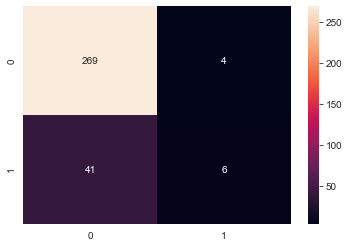

In [53]:
print("\nAcuracy of KNN classifier for test set: ", accuracy_score(y_test, Knn_classifier.predict(x_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, Knn_classifier.predict(x_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, Knn_classifier.predict(x_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, Knn_classifier.predict(x_test)), annot=True, fmt='d')

Acuracy of KNN classifier for train set:  90.61767005473025

Classification Report for train set : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1109
           1       0.90      0.33      0.48       170

    accuracy                           0.91      1279
   macro avg       0.90      0.66      0.72      1279
weighted avg       0.91      0.91      0.89      1279


Confusion Matrix for train set : 
 [[1103    6]
 [ 114   56]]

Confusion Matrix Heatamp for train set: 


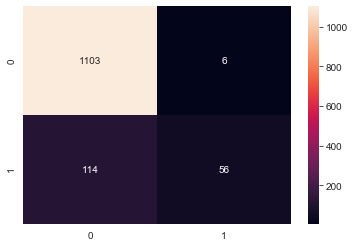

In [54]:
print("Acuracy of KNN classifier for train set: ", accuracy_score(y_train, Knn_classifier.predict(x_train))*100)
print('\nClassification Report for train set : \n', classification_report(y_train, Knn_classifier.predict(x_train)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(y_train, Knn_classifier.predict(x_train)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(y_train, Knn_classifier.predict(x_train)), annot=True, fmt='d')

## Random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=75)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=75)


Acuracy of random forest for test set:  89.6875

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.69      0.53      0.60        47

    accuracy                           0.90       320
   macro avg       0.81      0.75      0.77       320
weighted avg       0.89      0.90      0.89       320


Confusion Matrix for test case : 
 [[262  11]
 [ 22  25]]

Confusion Matrix Heatamp for test case: 


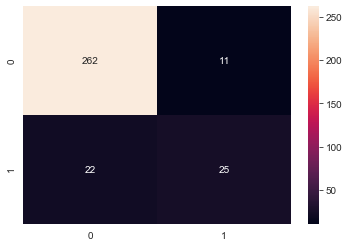

In [56]:
print("\nAcuracy of random forest for test set: ", accuracy_score(y_test, rfc.predict(x_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, rfc.predict(x_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, rfc.predict(x_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, rfc.predict(x_test)), annot=True, fmt='d')


Acuracy of random forest for train set:  100.0

Classification Report for train case : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1109
           1       1.00      1.00      1.00       170

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279


Confusion Matrix for train case : 
 [[1109    0]
 [   0  170]]

Confusion Matrix Heatamp for train case: 


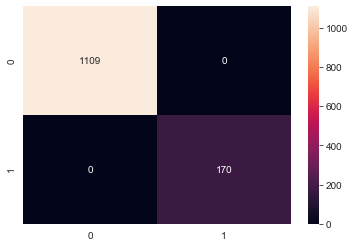

In [57]:
print("\nAcuracy of random forest for train set: ", accuracy_score(y_train, rfc.predict(x_train))*100)
print('\nClassification Report for train case : \n', classification_report(y_train, rfc.predict(x_train)))
print("\nConfusion Matrix for train case : \n", confusion_matrix(y_train, rfc.predict(x_train)))
print('\nConfusion Matrix Heatamp for train case: ')
sns.heatmap(confusion_matrix(y_train, rfc.predict(x_train)), annot=True, fmt='d')

## Desicion tree 

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(x_train, y_train)

DecisionTreeClassifier()


Acuracy of Decision tree for test set:  89.0625

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       273
           1       0.64      0.60      0.62        47

    accuracy                           0.89       320
   macro avg       0.78      0.77      0.78       320
weighted avg       0.89      0.89      0.89       320


Confusion Matrix for test case : 
 [[257  16]
 [ 19  28]]

Confusion Matrix Heatamp for test case: 


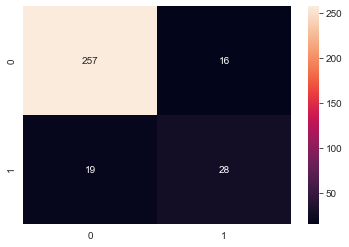

In [59]:
print("\nAcuracy of Decision tree for test set: ", accuracy_score(y_test, classifier_dt.predict(x_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, classifier_dt.predict(x_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, classifier_dt.predict(x_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, classifier_dt.predict(x_test)), annot=True, fmt='d')


Acuracy of Decision tree for train set:  100.0

Classification Report for train case : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1109
           1       1.00      1.00      1.00       170

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279


Confusion Matrix for train case : 
 [[1109    0]
 [   0  170]]

Confusion Matrix Heatamp for train case: 


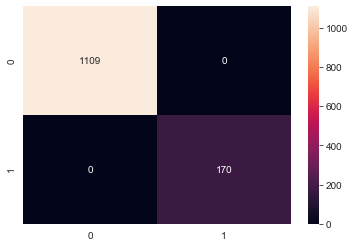

In [60]:
print("\nAcuracy of Decision tree for train set: ", accuracy_score(y_train, classifier_dt.predict(x_train))*100)
print('\nClassification Report for train case : \n', classification_report(y_train, classifier_dt.predict(x_train)))
print("\nConfusion Matrix for train case : \n", confusion_matrix(y_train, classifier_dt.predict(x_train)))
print('\nConfusion Matrix Heatamp for train case: ')
sns.heatmap(confusion_matrix(y_train, classifier_dt.predict(x_train)), annot=True, fmt='d')

# Accuracy of all classifier

In [61]:
test_accuracy = [accuracy_score(y_test, svm_classifier.predict(x_test))*100,
                accuracy_score(y_test, LogisticRegression.predict(x_test))*100,
                accuracy_score(y_test, Knn_classifier.predict(x_test))*100,
                accuracy_score(y_test, rfc.predict(x_test))*100,
                accuracy_score(y_test, classifier_dt.predict(x_test))*100]  


train_accuracy = [accuracy_score(y_train, svm_classifier.predict(x_train))*100,
                 accuracy_score(y_train, LogisticRegression.predict(x_train))*100,
                 accuracy_score(y_train, Knn_classifier.predict(x_train))*100,
                 accuracy_score(y_train, rfc.predict(x_train))*100,
                 accuracy_score(y_train, classifier_dt.predict(x_train))*100]  

In [62]:
Classifier = ['SVM Classifier', 'LogisticRegression', 'KNN Classifier', 'Random forest', 'desicion tree']

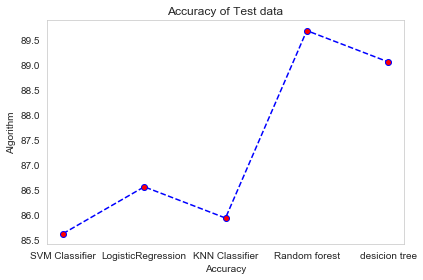

In [63]:
plt.plot(Classifier, test_accuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')
plt.ylabel('Algorithm')
plt.xlabel('Accuracy')
plt.title('Accuracy of Test data')
plt.grid()
plt.tight_layout()

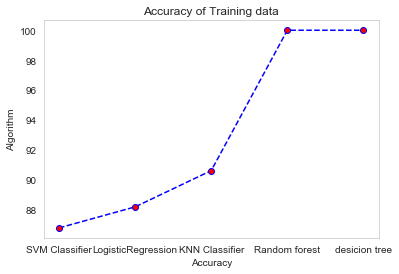

In [64]:
plt.plot(Classifier, train_accuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')
plt.ylabel('Algorithm')
plt.xlabel('Accuracy')
plt.title('Accuracy of Training data')
plt.grid()

In [65]:
print('Accuracy for Test Data : \n')
for i in range(5):
    print(Classifier[i], ':', test_accuracy[i])

Accuracy for Test Data : 

SVM Classifier : 85.625
LogisticRegression : 86.5625
KNN Classifier : 85.9375
Random forest : 89.6875
desicion tree : 89.0625


In [66]:
print('Accuracy for Traing Data : \n')
for i in range(5):
    print(Classifier[i], ':', train_accuracy[i])

Accuracy for Traing Data : 

SVM Classifier : 86.7865519937451
LogisticRegression : 88.19390148553558
KNN Classifier : 90.61767005473025
Random forest : 100.0
desicion tree : 100.0


# conclusion 
## Random forest has maximum accuracy for both test and train set

In [68]:
import pickle
pickle.dump(rfc, open('winemodel.pkl', 'wb'))